In [307]:
import numpy as np
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats
from scipy.stats import bootstrap
import scipy.interpolate as interpolate
from scipy.signal import correlate
from scipy.signal import correlation_lags
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import statsmodels.api as sm

In [308]:
# reading in the files 
file_path = '/Users/haley/Research/COLDEX/COLDEX/AllanHills_CMC1/AH Variability (Abel)/'
side2_df = pd.read_csv(file_path + 'OSU Adjusted Depths.csv')
side2_orig = side2_df

In [309]:
file_path = '/Users/haley/Research/COLDEX/COLDEX/AllanHills_CMC1/AH Top Data (Phoenix)/'
side1_df = pd.read_csv(file_path + 'All_phoenix_data_simplified.csv')
side1_run1 = side1_df[0:265]
side1_run2 = side1_df[265:]


In [310]:
# defining data's variables 
side1_run1_depth = side1_run1['Depth']
side1_run2_depth = side1_run2['Depth']
side2_orig_depth = side2_orig['Depth']
# side2_dup_depth = side2_dup['Depth']

side1_run1_dD = side1_run1['dD_vsmow']
side1_run2_dD = side1_run2['dD_vsmow']
side2_orig_dD = side2_orig['dD_vsmow']
# side2_dup_dD = side2_dup['dD_vsmow']

side1_run1_d18O = side1_run1['d18O_vsmow']
side1_run2_d18O = side1_run2['d18O_vsmow']
side2_orig_d18O = side2_orig['d18O_vsmow']
# side2_dup_d18O = side2_dup['d18O_vsmow']

side1_run1_dxs = side1_run1['dxs_vsmow']
side1_run2_dxs = side1_run2['dxs_vsmow']
side2_orig_dxs = side2_orig['dxs_vsmow']

In [311]:
# plotting the full data set dD

p = figure(plot_width=900, plot_height=300, title='dD vs depth', x_axis_label='Depth (m)', y_axis_label='dD')


p.circle(side1_run1_depth, side1_run1_dD, size=3, color='blue', legend_label='Sample Set #1 Run1 (UW)')
# p.circle(side1_run2_depth, side1_run2_dD, size=3, color='black', legend_label='Sample Set #1 Run2')

p.circle(side2_orig_depth, side2_orig_dD, size=3, color='red', legend_label='Sample Set #2 (OSU)')
# p.circle(small_var_depth_noah, small_var_dD_noah, size=3, color='cyan', legend_label='Small Variability (Noah)')
# p.circle(small_var_depth_haley, small_var_dD_haley, size=3, color='green', legend_label='Small Variability (Haley)')

p.legend.location = 'top_left'
p.legend.orientation = 'horizontal'

# Show the plot in the Jupyter Notebook
output_notebook()
show(p)

Loading BokehJS ...

In [101]:
# plotting the full data set dD

p = figure(plot_width=900, plot_height=300, title='dD vs depth', x_axis_label='Depth (m)', y_axis_label='dD')


p.circle(side1_run1_depth[190:215], side1_run1_dD[190:215], size=3, color='blue', legend_label='Sample Set #1 Run1 (UW)')
# p.circle(side1_run2_depth, side1_run2_dD, size=3, color='black', legend_label='Sample Set #1 Run2')

p.circle(side2_orig_depth[231:], side2_orig_dD[231:], size=3, color='red', legend_label='Sample Set #2 (OSU)')
# p.circle(small_var_depth_noah, small_var_dD_noah, size=3, color='cyan', legend_label='Small Variability (Noah)')
# p.circle(small_var_depth_haley, small_var_dD_haley, size=3, color='green', legend_label='Small Variability (Haley)')

p.legend.location = 'top_left'
p.legend.orientation = 'horizontal'

# Show the plot in the Jupyter Notebook
output_notebook()
show(p)

Loading BokehJS ...

In [115]:
depth_side1_13600 = side1_run1_depth[190:215]-135.92
dD_side1_13600 = side1_run1_dD[190:215]

depth_side2_13600 = side2_orig_depth[231:]-135.92
dD_side2_13600 = side2_orig_dD[231:]


In [116]:
# original correlation value
ccf_values = sm.tsa.stattools.ccf(dD_side1_13600, dD_side2_13600, adjusted=False)
corr = max(ccf_values)
corr

0.578043612846274

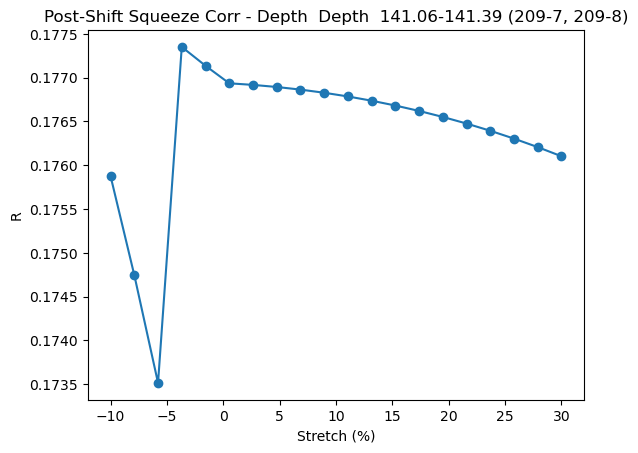

In [120]:
# here I am trying to use the 

depth2 = np.flip(depth_side1_13600)
depth1 = depth_side2_13600
iso2 = np.flip(dD_side1_13600)
iso1 = dD_side2_13600

x = depth1
y = iso1

best_shift = 0 

change = np.linspace(0.9, 1.3, 20)

correlation_values = []

for i in range(len(change)):
    new_depth = (depth1+best_shift) * change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot((change-1)*100, correlation_values, marker='o', linestyle='-')
plt.xlabel('Stretch (%)')
plt.ylabel('R')
plt.title('Post-Shift Squeeze Corr - Depth  Depth  141.06-141.39 (209-7, 209-8)')
plt.show()


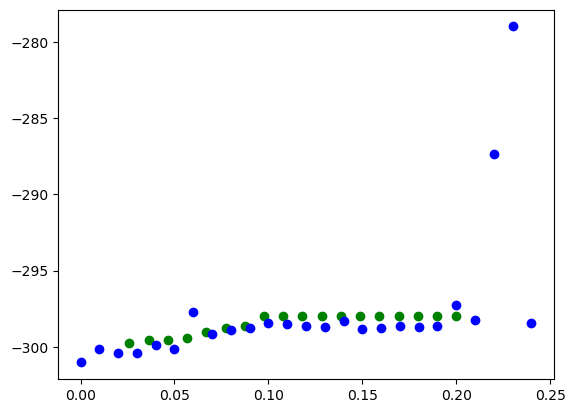

In [122]:
plt.plot(interp_depth, ynew, 'go')
plt.plot(depth2, iso2, 'bo')

In [147]:
depth_side1_13600 = side1_run1_depth[190:215]-135.92
dD_side1_13600 = side1_run1_dD[190:215]

depth_side2_13600 = (side2_orig_depth[231:]-135.92)*1
depth_side2_13600 = depth_side2_13600 - 0
depth_side2_13600_adjusted = (depth_side2_13600*1.25)-0.06
dD_side2_13600 = side2_orig_dD[231:]

Text(0.5, 1.0, '201-4 Shifted Depths')

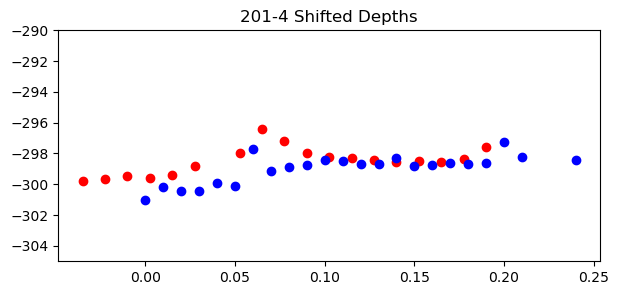

In [148]:
plt.figure(figsize=(7, 3))
plt.plot(depth_side2_13600_adjusted, dD_side2_13600, 'ro')
plt.plot(depth_side1_13600, dD_side1_13600, 'bo')
plt.ylim([-305,-290])
plt.title('201-4 Shifted Depths') 

In [150]:
depth2 = np.flip(depth_side1_13600)
depth1 = depth_side2_13600
iso2 = np.flip(dD_side1_13600)
iso1 = dD_side2_13600

x = depth1
y = iso1
xnew = depth_side2_13600_adjusted
ynew = np.interp(xnew, x, y)

min_depth = np.max([np.min(xnew), np.min(x)])
max_depth = np.min([np.max(xnew), np.max(x)])
    
interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
ynew = np.interp(interp_depth, x, y)
    
ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
corr = max(ccf_values)

In [151]:
corr

0.17745875318239127

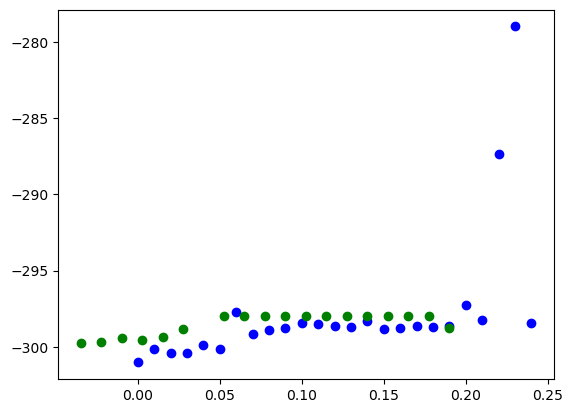

In [152]:
plt.plot(depth2, iso2, 'bo')
plt.plot(xnew, ynew, 'go')

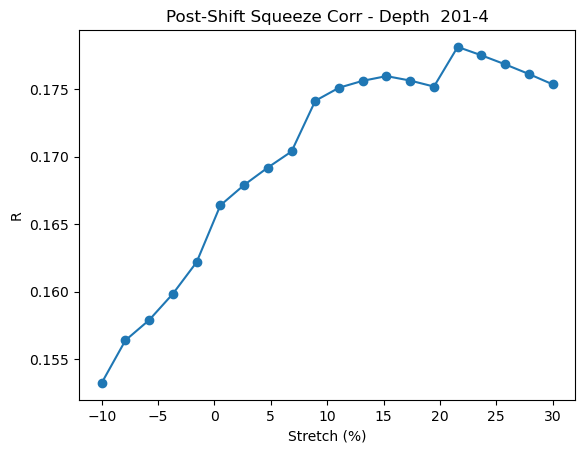

In [154]:
# here I am trying to use the 

depth2 = np.flip(depth_side1_13600)
depth1 = depth_side2_13600
iso2 = np.flip(dD_side1_13600)
iso1 = dD_side2_13600

x = depth1
y = iso1

best_shift = -0.06 

change = np.linspace(0.9, 1.3, 20)

correlation_values = []

for i in range(len(change)):
    new_depth = (depth1+best_shift) * change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot((change-1)*100, correlation_values, marker='o', linestyle='-')
plt.xlabel('Stretch (%)')
plt.ylabel('R')
plt.title('Post-Shift Squeeze Corr - Depth  201-4')
plt.show()


Text(0.5, 1.0, '207-1 Shifted Depths')

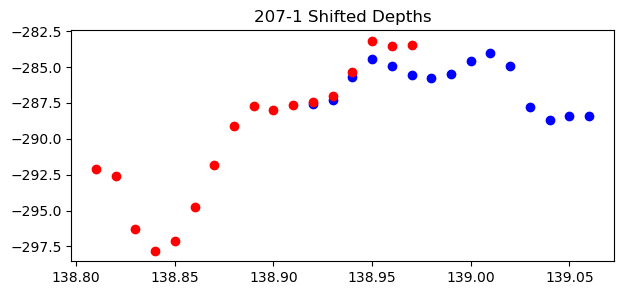

In [184]:
plt.figure(figsize=(7, 3))
plt.plot(side1_run1_depth[102:117], side1_run1_dD[102:117], 'bo')
plt.plot(side2_orig_depth[136:153], side2_orig_dD[136:153], 'ro')
plt.title('207-1 Shifted Depths') 

In [190]:
depth_side1_207_1 = side1_run1_depth[102:117]-138.80
dD_side1_207_1 = side1_run1_dD[102:117]

depth_side2_207_1 = (side2_orig_depth[136:153]-138.80)*1
dD_side2_207_1 = side2_orig_dD[136:153]

In [200]:
depth_side1_207_1_corr = depth_side1_207_1[9:15]
dD_side1_207_1_corr = dD_side1_207_1[9:15]

depth_side2_207_1_corr = depth_side2_207_1[11:]
dD_side2_207_1_corr = dD_side2_207_1[11:]


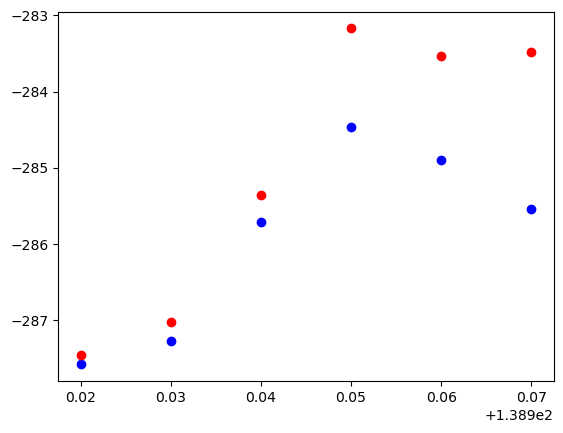

In [201]:
plt.plot(depth_side1_207_1_corr+138.80, dD_side1_207_1_corr, 'bo')
plt.plot(depth_side2_207_1_corr+138.80, dD_side2_207_1_corr, 'ro')


In [202]:
corr = max(sm.tsa.stattools.ccf(dD_side1_207_1_corr, dD_side2_207_1_corr, adjusted=False))
corr

0.5607921140992227

Text(0.5, 1.0, '207-6 and 207-7 Original Depth Assignment')

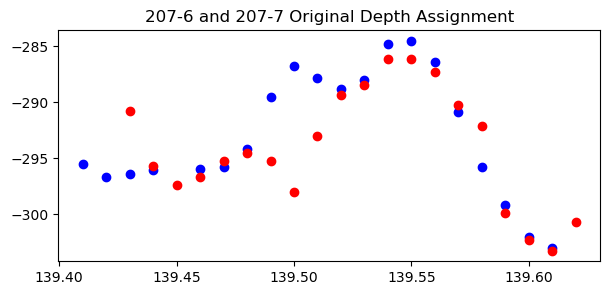

In [205]:
plt.figure(figsize=(7, 3))

plt.plot(side1_run1_depth[70:90], side1_run1_dD[70:90] ,'bo')#, legend_label='Sample Set #1 Run1 (UW)')

plt.plot(side2_orig_depth[20:40]+0.02, side2_orig_dD[20:40], 'ro')#, legend_label='Sample Set #2 (OSU)')

plt.title('207-6 and 207-7 Original Depth Assignment')

Text(0.5, 1.0, '208-8 Original Depth Assignment')

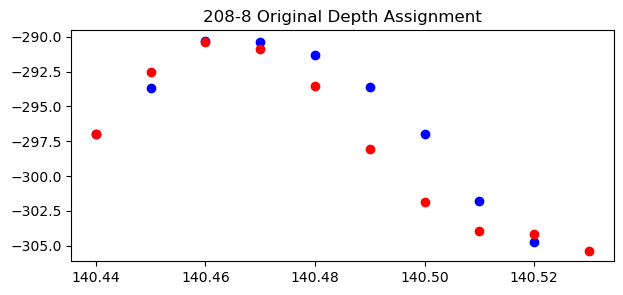

In [298]:
plt.figure(figsize=(7, 3))

plt.plot(side1_run1_depth[45:54], side1_run1_dD[45:54] ,'bo')#, legend_label='Sample Set #1 Run1 (UW)')

plt.plot(side2_orig_depth[9:19], side2_orig_dD[9:19], 'ro')#, legend_label='Sample Set #2 (OSU)')

plt.title('208-8 Original Depth Assignment')

In [299]:
depth_side1_208_8 = side1_run1_depth[45:54]-140.44
dD_side1_208_8 = side1_run1_dD[45:54]

depth_side2_208_8 = side2_orig_depth[9:19]-140.44
dD_side2_208_8 = side2_orig_dD[9:19]


In [300]:
ccf_values = sm.tsa.stattools.ccf(dD_side1_208_8, dD_side2_208_8, adjusted=False)
corr = max(ccf_values)
corr

0.44716232021676944

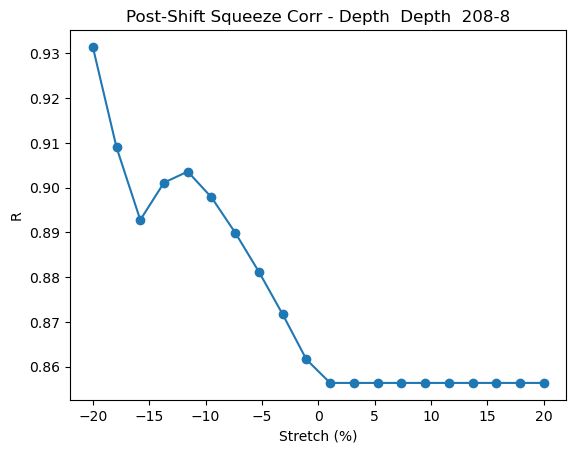

In [304]:
# here I am trying to use the 
depth2 = np.flip(depth_side1_208_8)
depth1 = depth_side2_208_8
iso2 = np.flip(dD_side1_208_8)
iso1 = dD_side2_208_8

x = depth1
y = iso1

change = np.linspace(0.8, 1.2, 20)
best_shift = 0

correlation_values = []

for i in range(len(change)):
    new_depth = (depth1+best_shift) * change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.max([np.min(xnew), np.min(x)])
    max_depth = np.min([np.max(xnew), np.max(x)])
    
    interp_depth = np.linspace(min_depth, max_depth, num=len(iso1))
    ynew = np.interp(interp_depth, x, y)
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot((change-1)*100, correlation_values, marker='o', linestyle='-')
plt.xlabel('Stretch (%)')
plt.ylabel('R')
plt.title('Post-Shift Squeeze Corr - Depth  Depth  208-8')
plt.show()


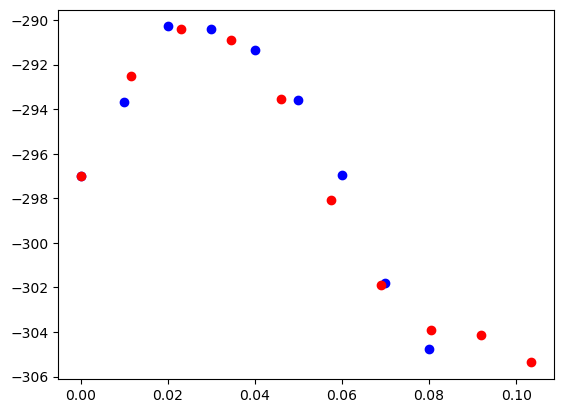

In [302]:
plt.plot(depth_side1_208_8, dD_side1_208_8, 'bo')
plt.plot(depth_side2_208_8*1.15, dD_side2_208_8, 'ro')

In [306]:
(depth_side2_208_8*1.15)+140.44

9     140.4400
10    140.4515
11    140.4630
12    140.4745
13    140.4860
14    140.4975
15    140.5090
16    140.5205
17    140.5320
18    140.5435
Name: Depth, dtype: float64